In [1]:
import math
import datasets
import IBM1 as ibm1
import debug_helpers
import convergence_criterion as cc
import persistence
import plots

# pretty print variabeles on line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def fname_ibm1(i):
    return f'ibm1_iter_{i}.txt'

# After each iteration we print llhood and AER and store the model 
# We can later load the models that meet our convergence criteria
# and apply those to the test data
def fn_after_iter_ibm1(i, lprobs, log_likelihood, AER):
    debug_helpers.print_likelihood(i, lprobs, log_likelihood, AER)
    if i > 0:
        persistence.store_ibm1_model(lprobs, fname_ibm1(i))
        
# Run EM on training data set with AER on validation set
def IBM1_Train():
    val_sentence_pairs, _, _ = datasets.validation_data()
    reference_alignments = datasets.validation_alignments()    
    s_t_pairs, s_vocabulary, t_vocabulary = datasets.training_data()
    (lprobs, log_lhoods, AERs) = ibm1.EM(
        s_t_pairs, s_vocabulary, t_vocabulary, 16,
        val_sentence_pairs, reference_alignments, 
        fn_after_iter_ibm1
    ) 
    return (lprobs, log_lhoods, AERs)

iteration  log_likelihood  likelihood  AER
0 -49501757.944 0.000 0.92877
1 -23049255.979 0.000 0.37678
2 -20068293.662 0.000 0.33749
3 -19158460.369 0.000 0.32981
4 -18847504.740 0.000 0.32852
5 -18708427.693 0.000 0.33044
6 -18634922.009 0.000 0.33237
7 -18591665.966 0.000 0.32915
8 -18564213.156 0.000 0.32787
9 -18545753.893 0.000 0.32755
10 -18532757.373 0.000 0.32177
11 -18523256.772 0.000 0.32177
12 -18516096.873 0.000 0.32081
13 -18510564.528 0.000 0.31717
14 -18506200.202 0.000 0.31814
15 -18502696.291 0.000 0.32008


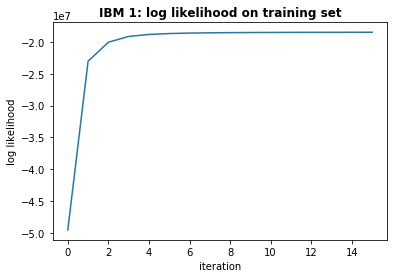

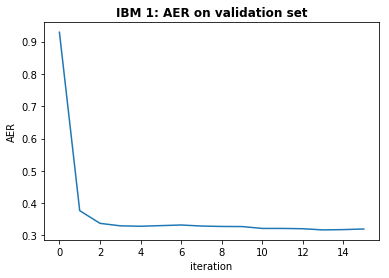

model selected on AER: ibm1_iter_5.txt
model selected on LLhood: ibm1_iter_5.txt


In [3]:
# train model
(lprobs, llhoods, AERs) = IBM1_Train()

# store AER and llhood scores in file
fname_ibm1_AERs = "ibm1_AERs_iter15.txt"    
fname_ibm1_llhoods = "ibm1_llhoods_iter15.txt"
persistence.store_iteration_results(AERs, fname_ibm1_AERs)
persistence.store_iteration_results(llhoods, fname_ibm1_llhoods)

# plot AER and llhood scores vs iteration
plots.figure_log_likelihood(llhoods, 'IBM1')
plots.figure_AER(AERs, 'IBM1')

# select models based on AER and llhood selection criterion
selected_model_AER = fname_ibm1(cc.select_model_AER(AERs))
selected_model_llhood = fname_ibm1(cc.select_model_LLhood(llhoods))
print('model selected on AER:', selected_model_AER)
print('model selected on LLhood:', selected_model_llhood)


In [14]:
# AER_model = persistence.load_ibm1_model(selected_model_AER)
# llhood_model = persistence.load_ibm1_model(selected_model_llhood)
# TODO: apply selected models to test set 
# (write NAACL and use official tool)

#load_iteration_results(fname_ibm1_AERs)
#load_iteration_results(fname_ibm1_llhoods)